# 2.2-osmnx获取道路数据

In [1]:
import osmnx as ox

In [2]:
G = ox.graph_from_place("Amsterdam, North Holland, Netherlands", network_type="drive")

In [3]:
# 使用ox.project_graph函数来投影图：
G_proj = ox.project_graph(G)

In [5]:
# 简化道路数据
G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)

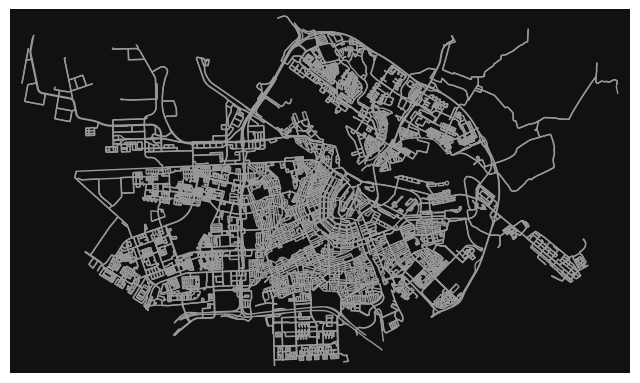

In [6]:
fig, ax = ox.plot_graph(G2, node_size=0)  # 不绘制node节点

## 2保存到文件地理数据库


In [ ]:
### 方法一，save_graph_geopackage直接保存
ox.save_graph_geopackage(G2, filepath="../data/UNZIP/osm/Amsterdam_road.gpkg")

### 方法二：首先将图转换为GeoPandas的GeoDataFrame，然后使用geopandas库的to_file方法将其保存到GDB。

In [7]:
# 将图转换为GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G2)

In [12]:
nodes

,osmid_original,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,,
0,6316199,5.803889e+06,628561.488412,3,4.888396,52.370173,NaN,NaN,POINT (628561.488 5803889.299)
1,46379627,5.803893e+06,628519.028688,4,4.887774,52.370216,NaN,NaN,POINT (628519.029 5803892.976)
2,46389218,5.804114e+06,628583.285627,4,4.888802,52.372186,NaN,NaN,POINT (628583.286 5804113.907)
3,4489285115,5.803629e+06,629828.425092,3,4.906894,52.367537,NaN,NaN,POINT (629828.425 5803629.213)
4,"[1334338691, 46354965]",5.803331e+06,631395.776874,0,NaN,NaN,NaN,NaN,POINT (631395.777 5803331.106)
...,...,...,...,...,...,...,...,...,...
7049,10781728733,5.801734e+06,625221.031918,3,4.838553,52.351582,NaN,NaN,POINT (625221.032 5801734.314)
7050,10781728737,5.801717e+06,625011.137779,3,4.835466,52.351472,NaN,NaN,POINT (625011.138 5801716.709)
7051,11022783033,5.802134e+06,630396.901380,3,4.914658,52.353971,NaN,NaN,POINT (630396.901 5802134.493)


In [17]:
import geopandas as gpd

# 定义要保存的文件地理数据库的路径
gpkg_path = '../../data/UNZIP/osm/Amsterdam_road.gpkg'

# 保存节点和边到GeoPackage文件
edges.to_file(gpkg_path, driver='GPKG', layer='edges',engine="pyogrio")

In [ ]:
# # 定义要保存的文件地理数据库的路径
# gdb_path = 'output.gdb'
# 
# # 保存节点和边到文件地理数据库
# nodes.to_file(gdb_path, driver='FileGDB', layer='nodes')
# edges.to_file(gdb_path, driver='FileGDB', layer='edges')